In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
dataset = pd.read_csv('datasets/Data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [40]:
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

In [33]:
# dataset.shape
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


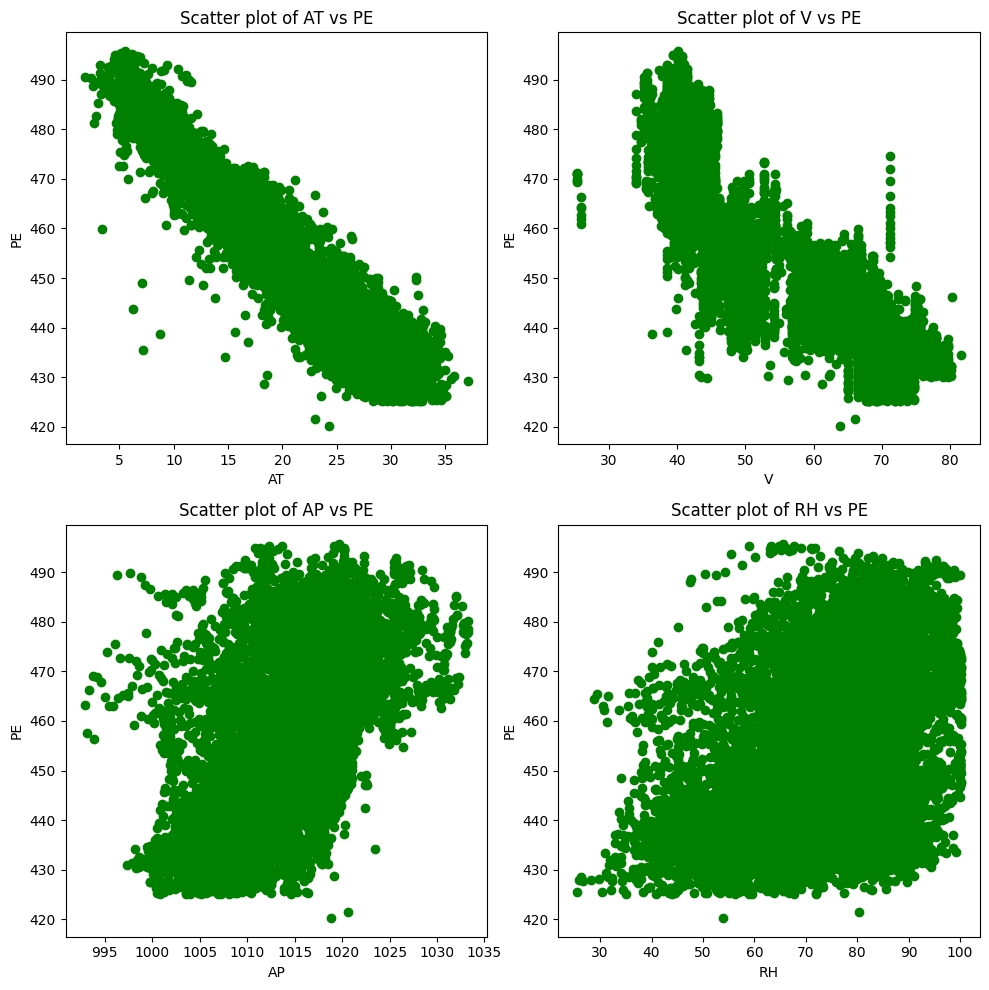

In [34]:
features = dataset.columns.drop('PE')

n_rows = len(features) // 2 + len(features) % 2
n_cols = 2

plt.figure(figsize=(10, 5 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(dataset[feature], dataset['PE'], c='g')
    plt.xlabel(feature)
    plt.ylabel('PE')
    plt.title(f'Scatter plot of {feature} vs PE')

plt.tight_layout()
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
# np.concatenate(y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1), 1)
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)[:20]

array([[457.26, 458.96],
       [466.72, 463.29],
       [440.37, 435.27],
       [482.58, 484.31],
       [474.88, 473.55],
       [448.82, 456.3 ],
       [440.15, 436.02],
       [478.06, 488.75],
       [466.99, 469.75],
       [479.48, 482.83],
       [482.03, 480.74],
       [429.35, 425.27],
       [438.22, 436.42],
       [478.6 , 460.72],
       [467.63, 466.06],
       [470.01, 464.93],
       [466.48, 464.27],
       [435.6 , 438.72],
       [471.1 , 474.73],
       [463.86, 463.31]])

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9321860060402447